In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u282-b08-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u282-b08-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


In [ ]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [15.9 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q http://apache.mirrors.hoobly.com/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

In [ ]:
!ls

drive  sample_data  spark-2.4.7-bin-hadoop2.7.tgz


In [ ]:
!tar -xvf spark-2.4.7-bin-hadoop2.7.tgz

spark-2.4.7-bin-hadoop2.7/
spark-2.4.7-bin-hadoop2.7/kubernetes/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-2.4.7-bin-hadoop2.7/NOTICE
spark-2.4.7-bin-hadoop2.7/data/
spark-2.4.7-bin-hadoop2.7/data/strea

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

## Starting Point: SparkSession

SparkSession in Spark 2.0 provides builtin support for Hive features including the ability to write queries using HiveQL, access to Hive UDFs, and the ability to read data from Hive tables. To use these features, you do not need to have an existing Hive setup.

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
from pyspark import SparkContext, SparkConf
sc = SparkContext.getOrCreate()

In [ ]:
from io import StringIO

In [ ]:
from pyspark.sql.types import StructType
import datetime

In [ ]:
df = spark.read.format('com.databricks.spark.csv').\
                        options(header='true', \
                        inferschema='true').\
              load("/content/drive/MyDrive/IDS 561/project/publicsafety-chicago-crime/chicago_crime_" + str(2014) + ".csv",header=True);
#df.select('date').toPandas().tail(100)
print((df.count(), len(df.columns)))

(274423, 17)


In [ ]:
df.show(1)

+-------+-----------+--------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+-------------+
|     ID|Case Number|                Date|              Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|    Latitude|    Longitude|
+-------+-----------+--------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+-------------+
|9446824|   HX100141|01/01/2014 02:00:...|0000X W ILLINOIS ST|0460|     BATTERY|     SIMPLE|              STREET| false|   false|1831|      18|  42|             8|     08B|41.890828047|-87.630234746|
+-------+-----------+--------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+-------------+


In [ ]:
year = [2015,2016]
for i in year:
  print(i)
  dfyear = spark.read.format('com.databricks.spark.csv').\
                        options(header='true', \
                        inferschema='true').\
              load("/content/drive/MyDrive/IDS 561/project/publicsafety-chicago-crime/chicago_crime_" + str(i) + ".csv",header=True);
  df = df.union(dfyear)
print((df.count(), len(df.columns)))

2015
2016
(754541, 17)


In [ ]:
df.show(1)

+-------+-----------+--------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+-------------+
|     ID|Case Number|                Date|              Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|    Latitude|    Longitude|
+-------+-----------+--------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+-------------+
|9446824|   HX100141|01/01/2014 02:00:...|0000X W ILLINOIS ST|0460|     BATTERY|     SIMPLE|              STREET| false|   false|1831|      18|  42|             8|     08B|41.890828047|-87.630234746|
+-------+-----------+--------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+-------------+


In [ ]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)



In [ ]:
from pyspark.sql.functions import *
from pyspark.sql import functions as f

In [ ]:
df = df.withColumn("date", f.from_unixtime(f.unix_timestamp("date",'MM/dd/yyyy hh:mm:ss aa'),'MM/dd/yyyy HH:mm:ss'))\
.withColumn('date', f.to_timestamp('date', 'MM/dd/yyyy HH:mm:ss'))\
.withColumn('dateonly', f.to_date(f.col("date")))\
.withColumn('year', f.date_format('date', 'yyyy'))\
.withColumn('month', f.date_format('date', 'MM'))\
.withColumn('day', f.date_format('date', 'dd'))\
.withColumn('dayofweek', f.dayofweek('date'))\
.withColumn('timeonly', f.date_format('date', 'HH:mm:ss'))\
.withColumn('hour', f.date_format('date', 'HH'))


In [ ]:
#df.select('dateonly').distinct().orderBy(desc("dateonly")).show(df.count())
df.select('timeonly').distinct().orderBy(f.desc("timeonly")).show(1)

+--------+
|timeonly|
+--------+
|23:59:00|
+--------+
only showing top 1 row



In [ ]:
df.select(min('dateonly').alias('first_record_date'), max('dateonly').alias('latest_record_date')).show()

+-----------------+------------------+
|first_record_date|latest_record_date|
+-----------------+------------------+
|       2014-01-01|        2016-10-24|
+-----------------+------------------+



In [ ]:
df.show(1)

+-------+-----------+-------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+-------------+----------+----+-----+---+---------+--------+----+
|     ID|Case Number|               date|              Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|    Latitude|    Longitude|  dateonly|year|month|day|dayofweek|timeonly|hour|
+-------+-----------+-------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+-------------+----------+----+-----+---+---------+--------+----+
|9446824|   HX100141|2014-01-01 02:00:00|0000X W ILLINOIS ST|0460|     BATTERY|     SIMPLE|              STREET| false|   false|1831|      18|  42|             8|     08B|41.890828047|-87.630234746|2014-01-01|2014|   01| 01|        4|02:00:00|  02|
+---

In [ ]:
df = df.withColumn('daypart',\
              f.when((f.col("hour") >= "06") & (f.col("hour") < "09"), "early morning")\
              .when((f.col("hour") >= "09") & (f.col("hour") < "12"), "late morning")\
              .when((f.col("hour") >= "12") & (f.col("hour") < "15"), "early afternoon")\
              .when((f.col("hour") >= "15") & (f.col("hour") < "18"), "late afternoon")\
              .when((f.col("hour") >= "18") & (f.col("hour") < "21"), "evening")\
              .when((f.col("hour") >= "21") & (f.col("hour") < "24"), "night")\
              .when((f.col("hour") >= "00") & (f.col("hour") < "03"), "late night")\
              .otherwise("toward morning"))

In [ ]:
df.select('daypart').distinct().orderBy(desc("daypart")).show()

+---------------+
|        daypart|
+---------------+
| toward morning|
|          night|
|     late night|
|   late morning|
| late afternoon|
|        evening|
|  early morning|
|early afternoon|
+---------------+



In [ ]:
df = df.withColumn('season',\
              f.when((f.col("month").isin(['03','04','05'])), "spring")\
              .when((f.col("month").isin(['06','07','08'])), "summer")\
              .when((f.col("month").isin(['09','10','11'])), "fall")\
              .otherwise("winter"))

In [ ]:
print((df.count(), len(df.columns)))

(754541, 26)


In [ ]:
df = df.withColumnRenamed("Primary Type","PrimaryType").\
withColumnRenamed("Location Description","LocationDescription").\
withColumnRenamed("Community Area","CommunityArea").\
withColumnRenamed("FBI Code","FBICode")

In [ ]:
df.describe().show()

+-------+--------------------+-----------+------------------+------------------+-----------------+--------------------+-------------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-----------------+--------+------------------+---------------+------+
|summary|                  ID|Case Number|             Block|              IUCR|      PrimaryType|         Description|LocationDescription|             Beat|         District|              Ward|     CommunityArea|           FBICode|           Latitude|          Longitude|              year|             month|               day|        dayofweek|timeonly|              hour|        daypart|season|
+-------+--------------------+-----------+------------------+------------------+-----------------+--------------------+-------------------+-----------------+-----------------+------------------+--------

In [ ]:
# too many blocks, we need to later exclude it from modeling.
df.select('Block').distinct().count()

31284

In [ ]:
df.groupBy('PrimaryType').count().orderBy(desc("count")).show()

+--------------------+------+
|         PrimaryType| count|
+--------------------+------+
|               THEFT|168404|
|             BATTERY|140287|
|     CRIMINAL DAMAGE| 82038|
|           NARCOTICS| 63194|
|             ASSAULT| 49568|
|       OTHER OFFENSE| 48458|
|  DECEPTIVE PRACTICE| 44127|
|            BURGLARY| 38991|
| MOTOR VEHICLE THEFT| 29019|
|             ROBBERY| 28885|
|   CRIMINAL TRESPASS| 19180|
|   WEAPONS VIOLATION|  9302|
|PUBLIC PEACE VIOL...|  6676|
|OFFENSE INVOLVING...|  6461|
| CRIM SEXUAL ASSAULT|  3835|
|        PROSTITUTION|  3662|
|INTERFERENCE WITH...|  3477|
|         SEX OFFENSE|  2662|
|            HOMICIDE|  1516|
|               ARSON|  1284|
+--------------------+------+
only showing top 20 rows



In [ ]:
df.groupBy('Block').count().orderBy(f.desc("count")).show()

+--------------------+-----+
|               Block|count|
+--------------------+-----+
|    001XX N STATE ST| 2167|
| 0000X W TERMINAL ST| 1444|
|008XX N MICHIGAN AVE| 1192|
|  076XX S CICERO AVE| 1063|
|    0000X N STATE ST|  923|
| 083XX S STEWART AVE|  745|
|064XX S DR MARTIN...|  661|
|    100XX W OHARE ST|  637|
|    011XX S CANAL ST|  624|
|  051XX W MADISON ST|  623|
|  042XX W MADISON ST|  567|
|006XX N MICHIGAN AVE|  564|
|063XX S DR MARTIN...|  560|
|   046XX W NORTH AVE|  551|
|  0000X W HUBBARD ST|  538|
|038XX W ROOSEVELT RD|  532|
|    0000X S STATE ST|  519|
|  012XX S WABASH AVE|  518|
| 009XX W BELMONT AVE|  493|
|071XX S JEFFERY BLVD|  470|
+--------------------+-----+
only showing top 20 rows



In [ ]:
df.groupBy('Block','PrimaryType').count().orderBy(desc("count")).show()

+--------------------+-----------------+-----+
|               Block|      PrimaryType|count|
+--------------------+-----------------+-----+
|    001XX N STATE ST|            THEFT| 1600|
|008XX N MICHIGAN AVE|            THEFT|  903|
|  076XX S CICERO AVE|            THEFT|  892|
|    0000X N STATE ST|            THEFT|  742|
| 083XX S STEWART AVE|            THEFT|  604|
| 0000X W TERMINAL ST|            THEFT|  556|
|   046XX W NORTH AVE|            THEFT|  460|
|    011XX S CANAL ST|            THEFT|  451|
| 033XX W FILLMORE ST|        NARCOTICS|  417|
|006XX N MICHIGAN AVE|            THEFT|  356|
| 0000X W TERMINAL ST|CRIMINAL TRESPASS|  338|
|    0000X S STATE ST|            THEFT|  324|
|007XX N MICHIGAN AVE|            THEFT|  321|
|    100XX W OHARE ST|            THEFT|  318|
|  042XX W MADISON ST|        NARCOTICS|  312|
|  051XX W MADISON ST|        NARCOTICS|  302|
| 052XX N SHERIDAN RD|            THEFT|  294|
|  039XX W GLADYS AVE|        NARCOTICS|  283|
| 0000X W TER

In [ ]:
import seaborn as sns

[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

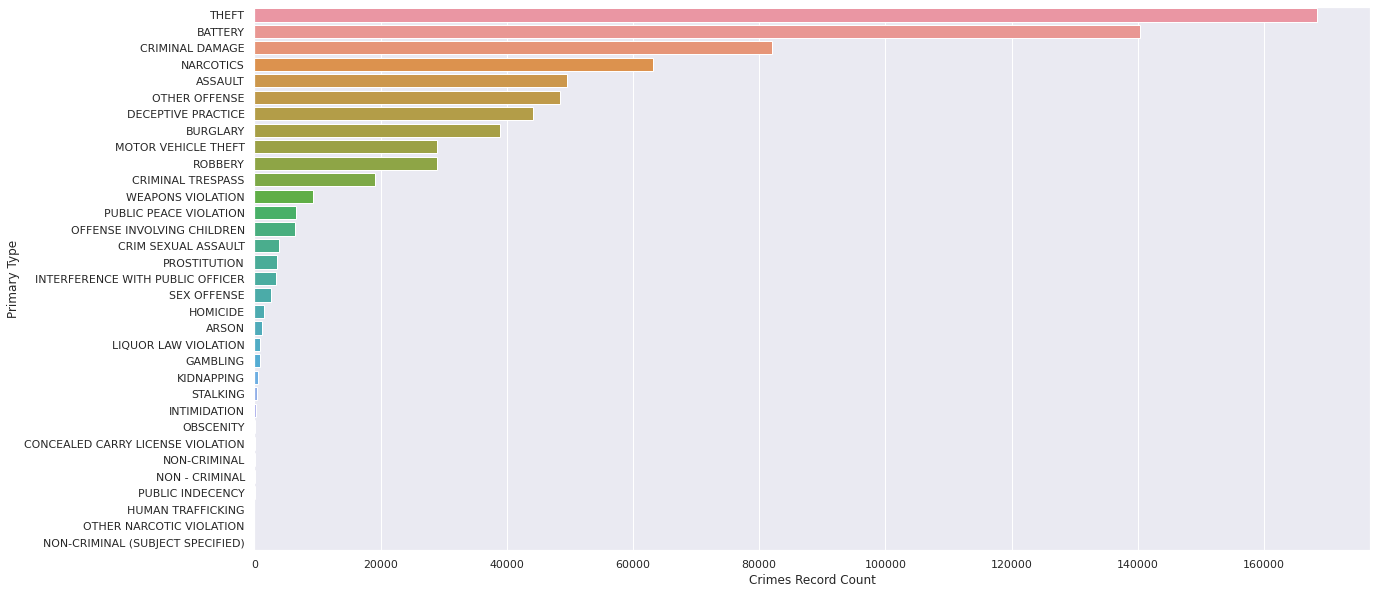

In [ ]:
crimescount = df.groupBy('PrimaryType').count().orderBy(desc("count")).toPandas()
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(x='count', y='PrimaryType', data=crimescount)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

[Text(0, 0.5, 'Block'), Text(0.5, 0, 'Crimes Record Count')]

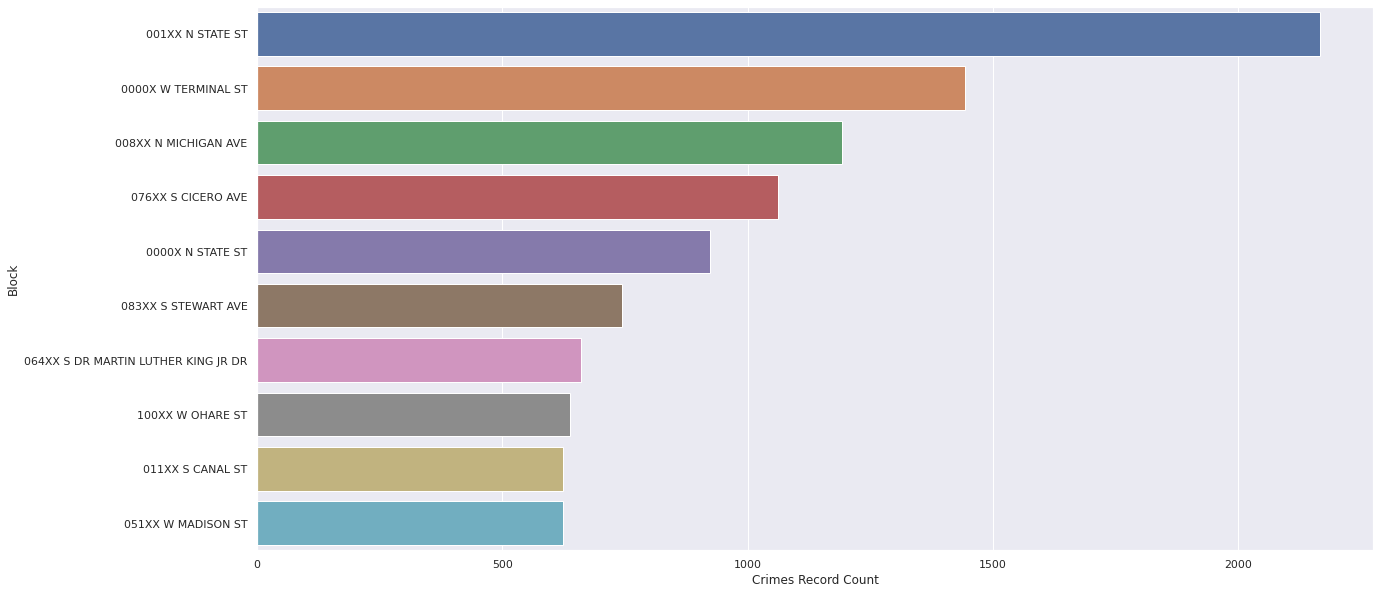

In [ ]:
blockscount = df.groupBy('Block').count().orderBy(desc("count")).toPandas().head(10)
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(x='count', y='Block', data=blockscount)
type_graph.set(ylabel="Block", xlabel="Crimes Record Count")

In [ ]:
crimesblockcount = df.groupBy('Block','PrimaryType').count().orderBy(desc("count"))
crimesblockcount = crimesblockcount.select('Block', 'PrimaryType','count',f.concat(f.col('Block'), \
                     f.lit(' - '), \
                     f.col('PrimaryType')).alias("crimesblock"))

In [ ]:
crimesblockcount.show(5)

+--------------------+-----------+-----+--------------------+
|               Block|PrimaryType|count|         crimesblock|
+--------------------+-----------+-----+--------------------+
|    001XX N STATE ST|      THEFT| 1600|001XX N STATE ST ...|
|008XX N MICHIGAN AVE|      THEFT|  903|008XX N MICHIGAN ...|
|  076XX S CICERO AVE|      THEFT|  892|076XX S CICERO AV...|
|    0000X N STATE ST|      THEFT|  742|0000X N STATE ST ...|
| 083XX S STEWART AVE|      THEFT|  604|083XX S STEWART A...|
+--------------------+-----------+-----+--------------------+
only showing top 5 rows



[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

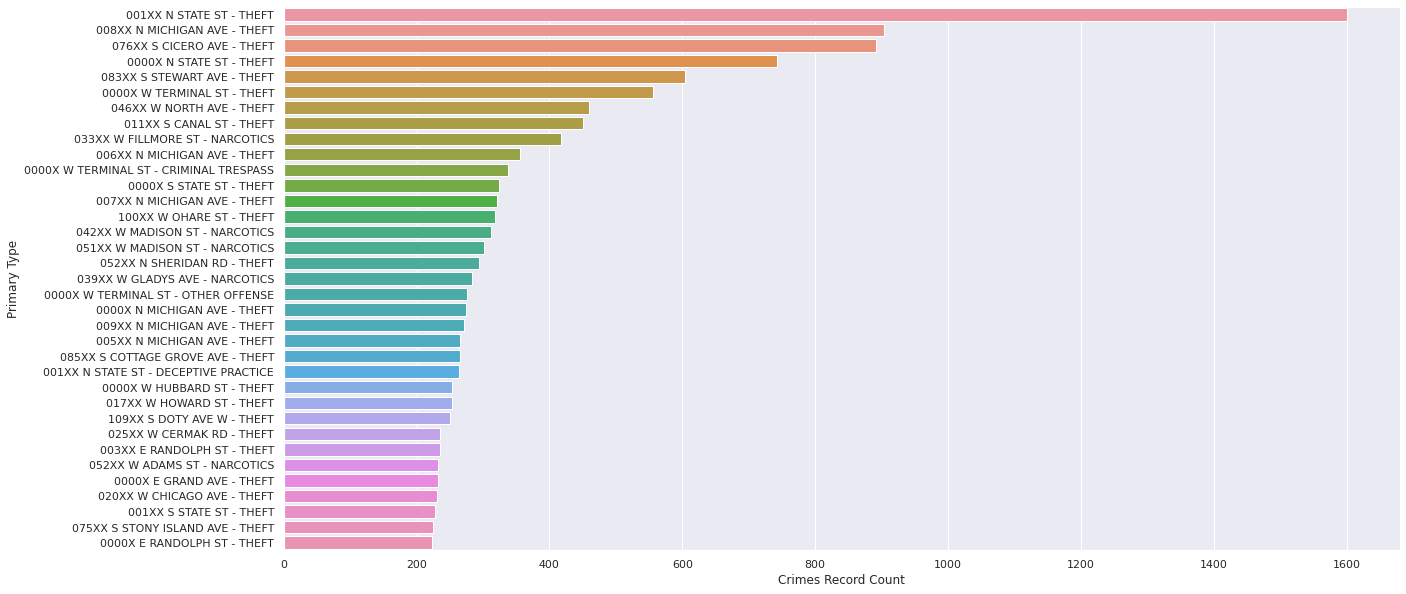

In [ ]:
plot = crimesblockcount.toPandas().head(35)
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(x='count', y='crimesblock', data=plot)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

In [ ]:
df.show(1)

+-------+-----------+-------------------+-------------------+----+-----------+-----------+-------------------+------+--------+----+--------+----+-------------+-------+------------+-------------+----------+----+-----+---+---------+--------+----+----------+------+
|     ID|Case Number|               date|              Block|IUCR|PrimaryType|Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|    Latitude|    Longitude|  dateonly|year|month|day|dayofweek|timeonly|hour|   daypart|season|
+-------+-----------+-------------------+-------------------+----+-----------+-----------+-------------------+------+--------+----+--------+----+-------------+-------+------------+-------------+----------+----+-----+---+---------+--------+----+----------+------+
|9446824|   HX100141|2014-01-01 02:00:00|0000X W ILLINOIS ST|0460|    BATTERY|     SIMPLE|             STREET| false|   false|1831|      18|  42|            8|    08B|41.890828047|-87.630234746|2014-01-01|2014| 

In [ ]:
arrest_season = df.groupBy(['arrest', 'season'])\
                     .count()\
                     .orderBy(['count'], ascending=[True, False])

arrest_season.show(arrest_season.count())

+------+------+------+
|arrest|season| count|
+------+------+------+
|  true|winter| 40659|
|  true|  fall| 42382|
|  true|summer| 52775|
|  true|spring| 54042|
| false|winter|114784|
| false|  fall|132772|
| false|spring|148229|
| false|summer|168898|
+------+------+------+



[Text(0, 0.5, 'count'), Text(0.5, 0, 'season')]

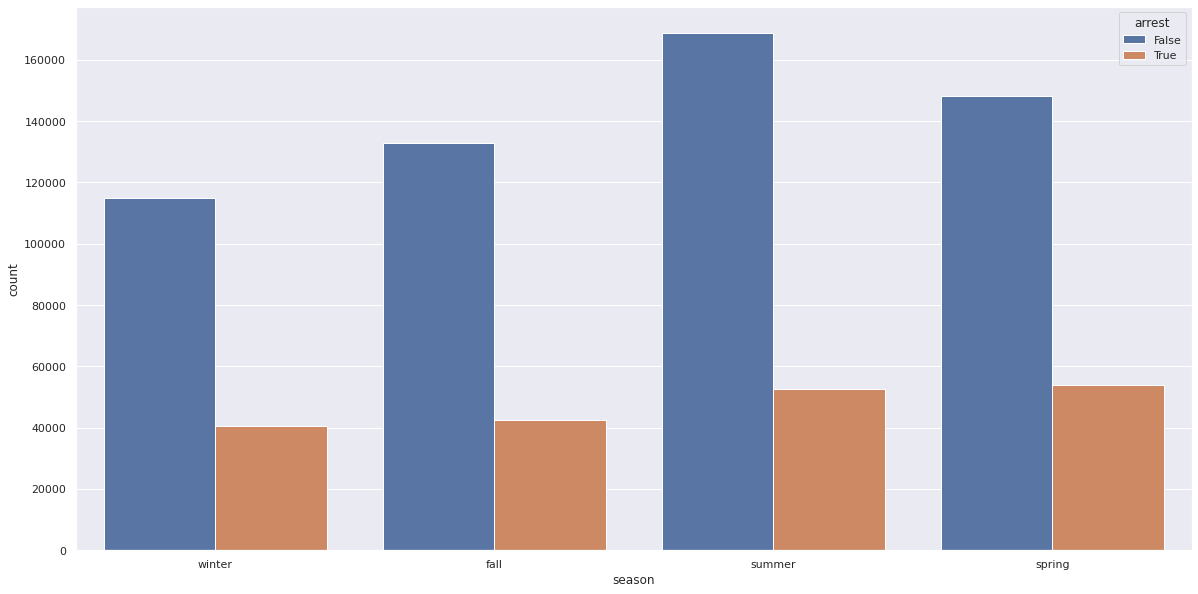

In [ ]:
plot = arrest_season.toPandas()
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(x='season', y='count',hue= "arrest", data=plot)
type_graph.set(ylabel="count", xlabel="season")

In [ ]:
type_arrest_date = df.groupBy(['arrest', 'month'])\
                     .count()\
                     .orderBy(['month', 'count'], ascending=[True, False])

type_arrest_date.show(type_arrest_date.count())

+------+-----+-----+
|arrest|month|count|
+------+-----+-----+
| false|   01|44829|
|  true|   01|15960|
| false|   02|37755|
|  true|   02|15044|
| false|   03|47374|
|  true|   03|18135|
| false|   04|47820|
|  true|   04|17446|
| false|   05|53035|
|  true|   05|18461|
| false|   06|54338|
|  true|   06|17621|
| false|   07|56932|
|  true|   07|17966|
| false|   08|57628|
|  true|   08|17188|
| false|   09|53567|
|  true|   09|16207|
| false|   10|48925|
|  true|   10|15324|
| false|   11|30280|
|  true|   11|10851|
| false|   12|32200|
|  true|   12| 9655|
+------+-----+-----+



[Text(0, 0.5, 'Arrest Count'), Text(0.5, 0, 'Month')]

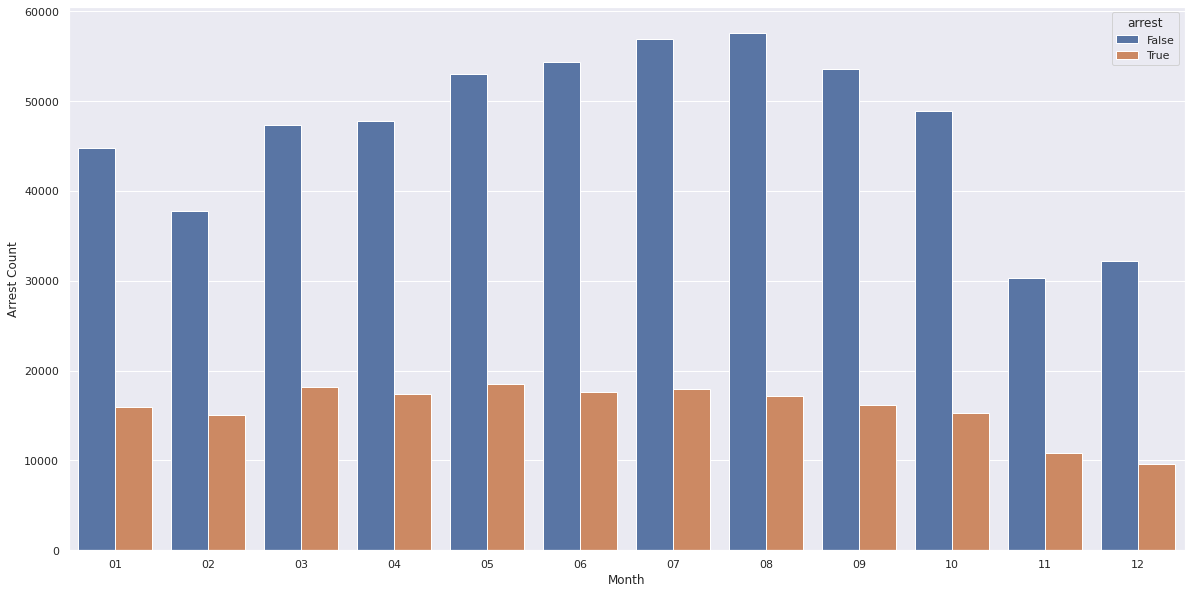

In [ ]:
plot = type_arrest_date.toPandas()
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(x='month', y='count',hue= "arrest", data=plot)
type_graph.set(ylabel="Arrest Count", xlabel="Month")

In [ ]:
arrest_day = df.groupBy(['arrest', 'day'])\
                     .count()\
                     .orderBy(['day', 'count'], ascending=[True, False])

arrest_day.show(arrest_day.count())

+------+---+-----+
|arrest|day|count|
+------+---+-----+
| false| 01|22739|
|  true| 01| 6457|
| false| 02|17991|
|  true| 02| 6367|
| false| 03|18382|
|  true| 03| 6294|
| false| 04|18099|
|  true| 04| 6204|
| false| 05|18486|
|  true| 05| 6186|
| false| 06|18091|
|  true| 06| 6342|
| false| 07|18520|
|  true| 07| 6349|
| false| 08|17849|
|  true| 08| 6189|
| false| 09|17750|
|  true| 09| 6257|
| false| 10|18283|
|  true| 10| 6092|
| false| 11|18154|
|  true| 11| 6401|
| false| 12|18160|
|  true| 12| 6451|
| false| 13|18597|
|  true| 13| 6268|
| false| 14|18901|
|  true| 14| 6321|
| false| 15|19529|
|  true| 15| 6299|
| false| 16|18874|
|  true| 16| 6322|
| false| 17|18868|
|  true| 17| 6425|
| false| 18|18716|
|  true| 18| 6257|
| false| 19|18473|
|  true| 19| 6439|
| false| 20|19053|
|  true| 20| 6459|
| false| 21|18721|
|  true| 21| 6201|
| false| 22|18444|
|  true| 22| 6368|
| false| 23|18748|
|  true| 23| 6366|
| false| 24|18796|
|  true| 24| 6080|
| false| 25|18072|
|  true| 25|

[Text(0, 0.5, 'Arrest Count'), Text(0.5, 0, 'Day')]

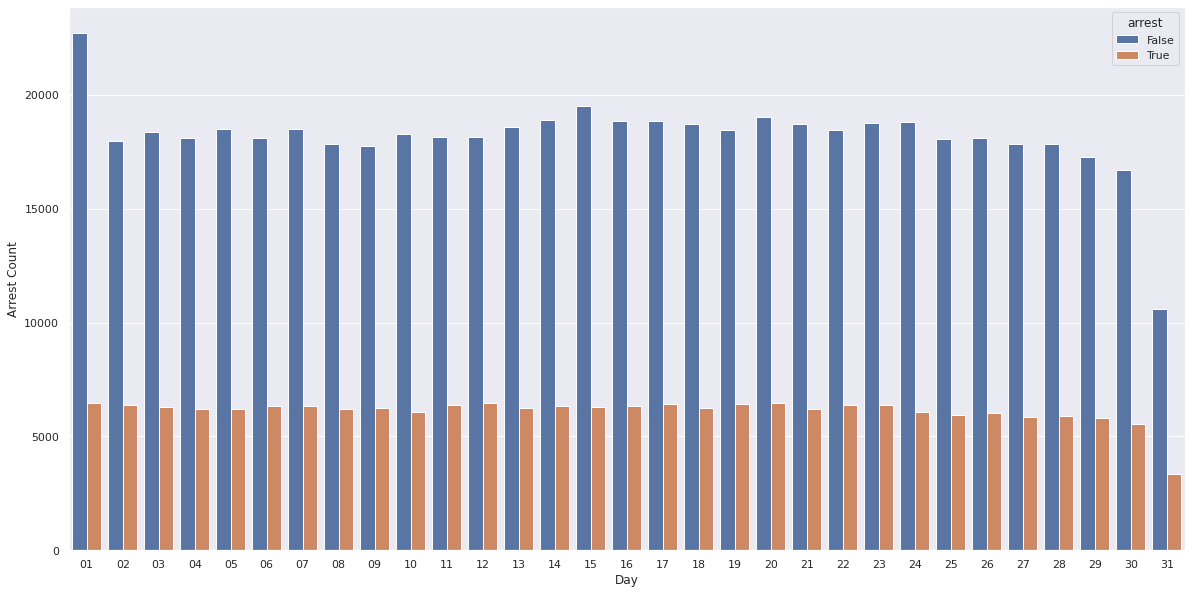

In [ ]:
plot = arrest_day.toPandas()
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(x='day', y='count',hue= "arrest", data=plot)
type_graph.set(ylabel="Arrest Count", xlabel="Day")

In [ ]:
arrest_dayofweek = df.groupBy(['arrest', 'dayofweek'])\
                     .count()\
                     .orderBy(['dayofweek', 'count'], ascending=[True, False])

arrest_dayofweek.show(arrest_dayofweek.count())

+------+---------+-----+
|arrest|dayofweek|count|
+------+---------+-----+
| false|        1|80236|
|  true|        1|26124|
| false|        2|80857|
|  true|        2|25886|
| false|        3|78353|
|  true|        3|26930|
| false|        4|79120|
|  true|        4|27505|
| false|        5|79170|
|  true|        5|27278|
| false|        6|84396|
|  true|        6|28765|
| false|        7|82551|
|  true|        7|27370|
+------+---------+-----+



[Text(0, 0.5, 'Arrest Count'), Text(0.5, 0, 'Day of Week')]

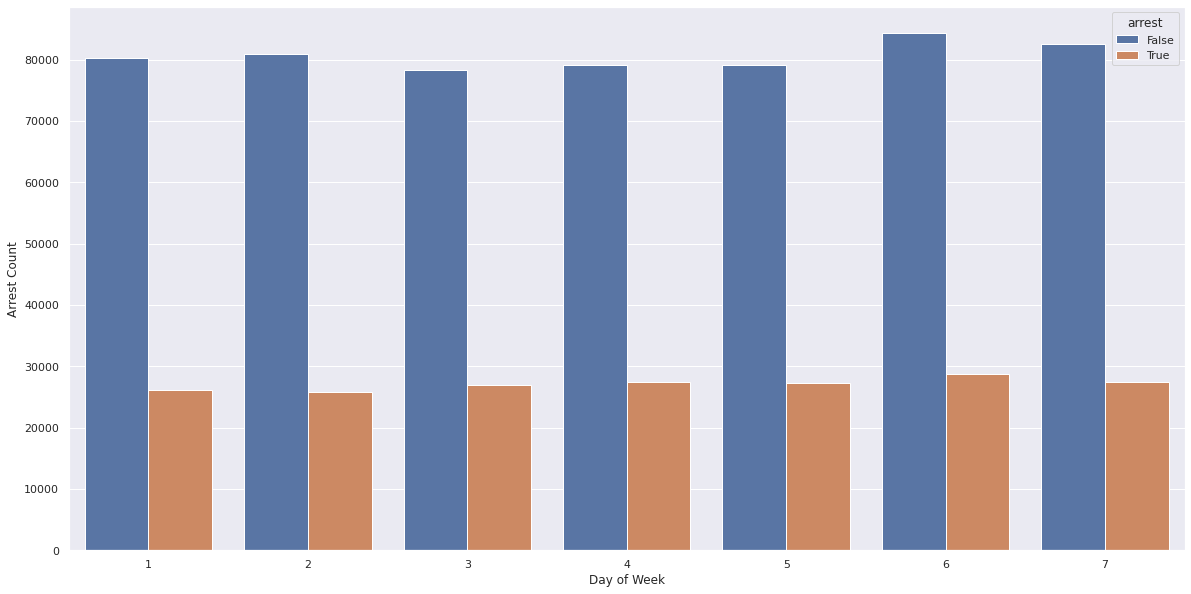

In [ ]:
# 1 is for Monday and 7 is for Sunday
plot = arrest_dayofweek.toPandas()
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(x='dayofweek', y='count',hue= "arrest", data=plot)
type_graph.set(ylabel="Arrest Count", xlabel="Day of Week")

In [ ]:
arrest_daypart = df.groupBy(['arrest', 'daypart'])\
                     .count()\
                     .orderBy(desc('count'))

arrest_daypart.show(arrest_daypart.count())

+------+---------------+-----+
|arrest|        daypart|count|
+------+---------------+-----+
| false| late afternoon|90443|
| false|        evening|89918|
| false|early afternoon|87299|
| false|          night|78453|
| false|   late morning|78421|
| false|     late night|60541|
| false|  early morning|47008|
|  true|        evening|39617|
| false| toward morning|32600|
|  true|          night|32590|
|  true| late afternoon|30388|
|  true|early afternoon|29906|
|  true|   late morning|24114|
|  true|     late night|17228|
|  true|  early morning| 9318|
|  true| toward morning| 6697|
+------+---------------+-----+



[Text(0, 0.5, 'count'), Text(0.5, 0, 'daypart')]

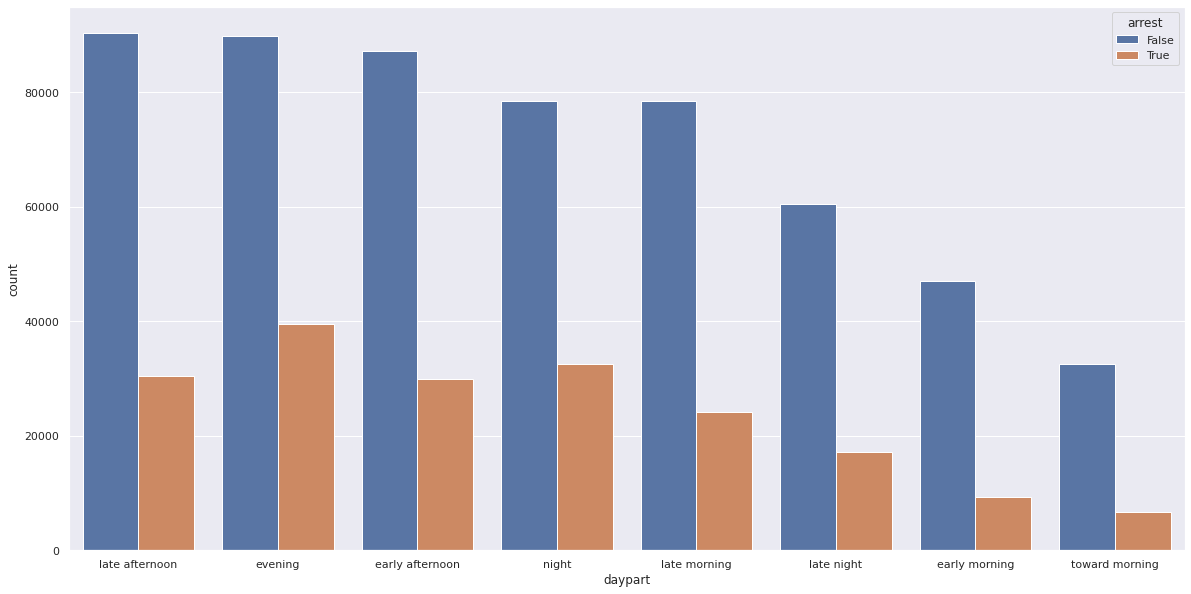

In [ ]:
plot = arrest_daypart.toPandas()
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(x='daypart', y='count',hue= "arrest", data=plot)
type_graph.set(ylabel="count", xlabel="daypart")

In [ ]:
PrimaryType_daypart = df.groupBy(['PrimaryType', 'daypart'])\
                     .count()\
                     .orderBy(desc("count"))

PrimaryType_daypart.show()

+------------------+---------------+-----+
|       PrimaryType|        daypart|count|
+------------------+---------------+-----+
|             THEFT| late afternoon|31899|
|             THEFT|early afternoon|31156|
|             THEFT|        evening|28974|
|             THEFT|   late morning|22997|
|           BATTERY|          night|22938|
|           BATTERY|        evening|21919|
|           BATTERY| late afternoon|21773|
|             THEFT|          night|20250|
|           BATTERY|     late night|19391|
|           BATTERY|early afternoon|18185|
|         NARCOTICS|        evening|16480|
|           BATTERY|   late morning|15657|
|   CRIMINAL DAMAGE|          night|15083|
|   CRIMINAL DAMAGE|        evening|14306|
|             THEFT|     late night|13585|
|             THEFT|  early morning|12675|
|         NARCOTICS|          night|11817|
|   CRIMINAL DAMAGE| late afternoon|11234|
|DECEPTIVE PRACTICE|   late morning|11169|
|         NARCOTICS|early afternoon|11098|
+----------

[Text(0, 0.5, 'count'), Text(0.5, 0, 'daypart')]

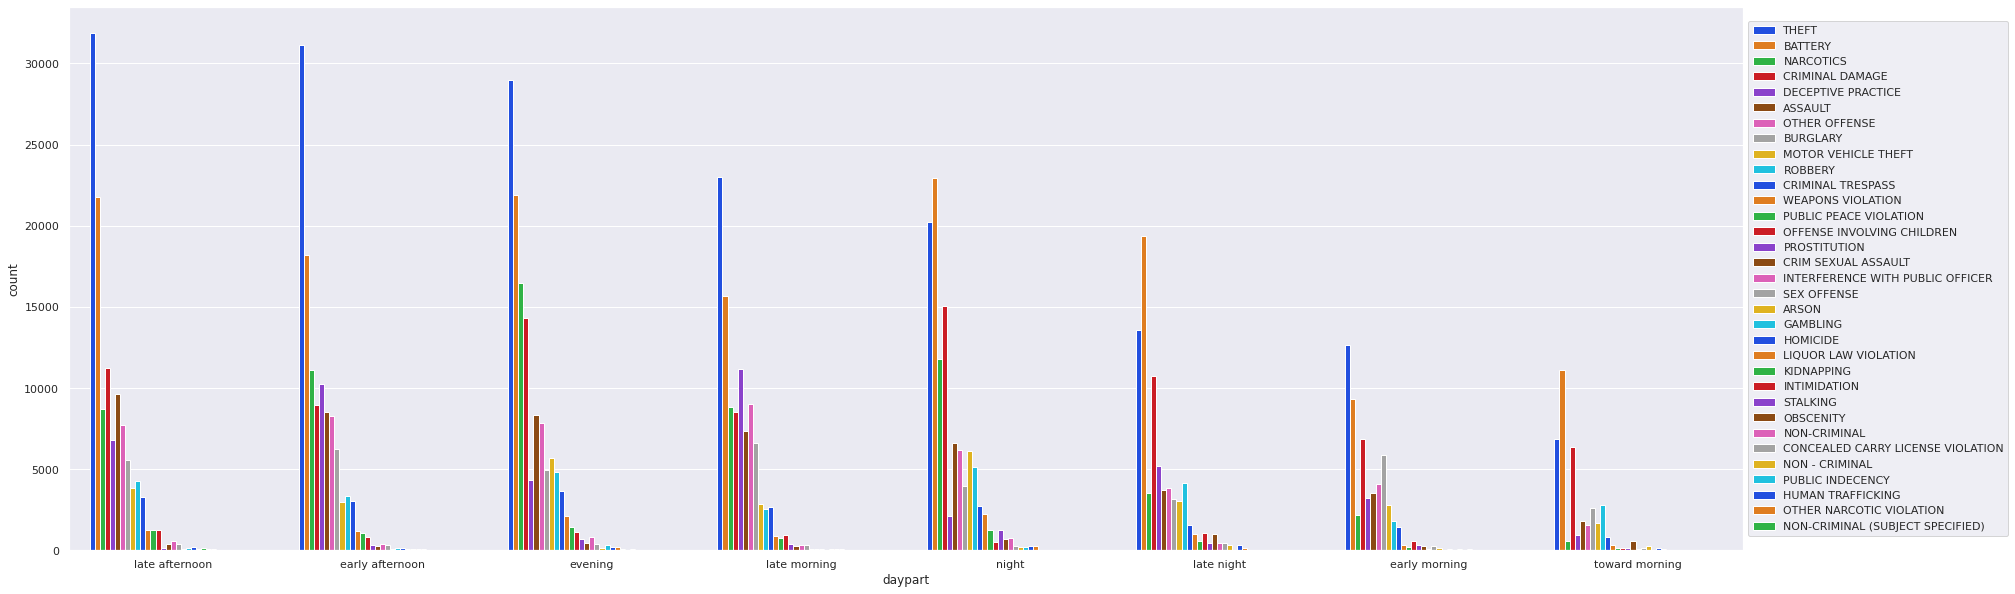

In [ ]:
plot = PrimaryType_daypart.toPandas()
sns.set(rc={'figure.figsize':(30,10)})
type_graph = sns.barplot(x='daypart', y='count',hue= "PrimaryType",palette="bright", data=plot)
type_graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))
type_graph.set(ylabel="count", xlabel="daypart")

In [ ]:
arrest_daypart = df.groupBy(['PrimaryType', 'arrest'])\
                     .count()\
                     .orderBy(desc("count"))

arrest_daypart.show()

+--------------------+------+------+
|         PrimaryType|arrest| count|
+--------------------+------+------+
|               THEFT| false|149149|
|             BATTERY| false|107844|
|     CRIMINAL DAMAGE| false| 76764|
|           NARCOTICS|  true| 63029|
|  DECEPTIVE PRACTICE| false| 40869|
|             ASSAULT| false| 38164|
|            BURGLARY| false| 37045|
|       OTHER OFFENSE| false| 36878|
|             BATTERY|  true| 32443|
| MOTOR VEHICLE THEFT| false| 26765|
|             ROBBERY| false| 26339|
|               THEFT|  true| 19255|
|   CRIMINAL TRESPASS|  true| 12981|
|       OTHER OFFENSE|  true| 11580|
|             ASSAULT|  true| 11404|
|   WEAPONS VIOLATION|  true|  7159|
|   CRIMINAL TRESPASS| false|  6199|
|OFFENSE INVOLVING...| false|  5486|
|     CRIMINAL DAMAGE|  true|  5274|
|PUBLIC PEACE VIOL...|  true|  5164|
+--------------------+------+------+
only showing top 20 rows



[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'count')]

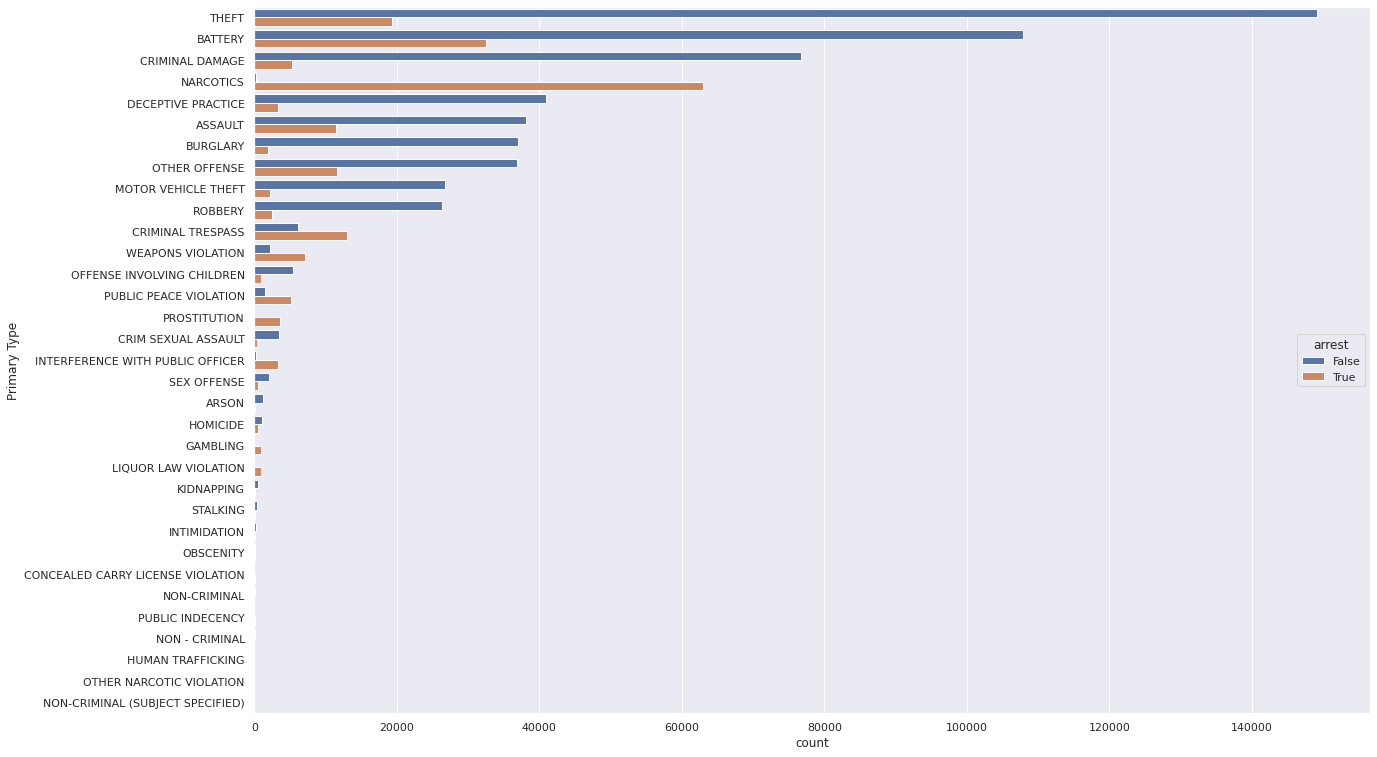

In [ ]:
plot = arrest_daypart.toPandas()
sns.set(rc={'figure.figsize':(20,13)})
type_graph = sns.barplot(x='count', y='PrimaryType',hue= "arrest", data=plot)
type_graph.set(ylabel="Primary Type", xlabel="count")

In [ ]:
df.show(1)

+-------+-----------+-------------------+-------------------+----+-----------+-----------+-------------------+------+--------+----+--------+----+-------------+-------+------------+-------------+----------+----+-----+---+---------+--------+----+----------+------+
|     ID|Case Number|               date|              Block|IUCR|PrimaryType|Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|    Latitude|    Longitude|  dateonly|year|month|day|dayofweek|timeonly|hour|   daypart|season|
+-------+-----------+-------------------+-------------------+----+-----------+-----------+-------------------+------+--------+----+--------+----+-------------+-------+------------+-------------+----------+----+-----+---+---------+--------+----+----------+------+
|9446824|   HX100141|2014-01-01 02:00:00|0000X W ILLINOIS ST|0460|    BATTERY|     SIMPLE|             STREET| false|   false|1831|      18|  42|            8|    08B|41.890828047|-87.630234746|2014-01-01|2014| 

In [ ]:
location_hour = df.groupby('LocationDescription','hour').count().orderBy('hour', ascending = True)

In [ ]:
location_hour.show(10)

+--------------------+----+-----+
| LocationDescription|hour|count|
+--------------------+----+-----+
|           PAWN SHOP|  00|    1|
|SPORTS ARENA/STADIUM|  00|   24|
| MOVIE HOUSE/THEATER|  00|   15|
|SCHOOL, PRIVATE, ...|  00|    6|
|PARKING LOT/GARAG...|  00|  697|
|VEHICLE - DELIVER...|  00|    1|
|AIRPORT TERMINAL ...|  00|   11|
|ATM (AUTOMATIC TE...|  00|  174|
|         HOTEL/MOTEL|  00|  188|
|    RESIDENCE-GARAGE|  00|  760|
+--------------------+----+-----+
only showing top 10 rows



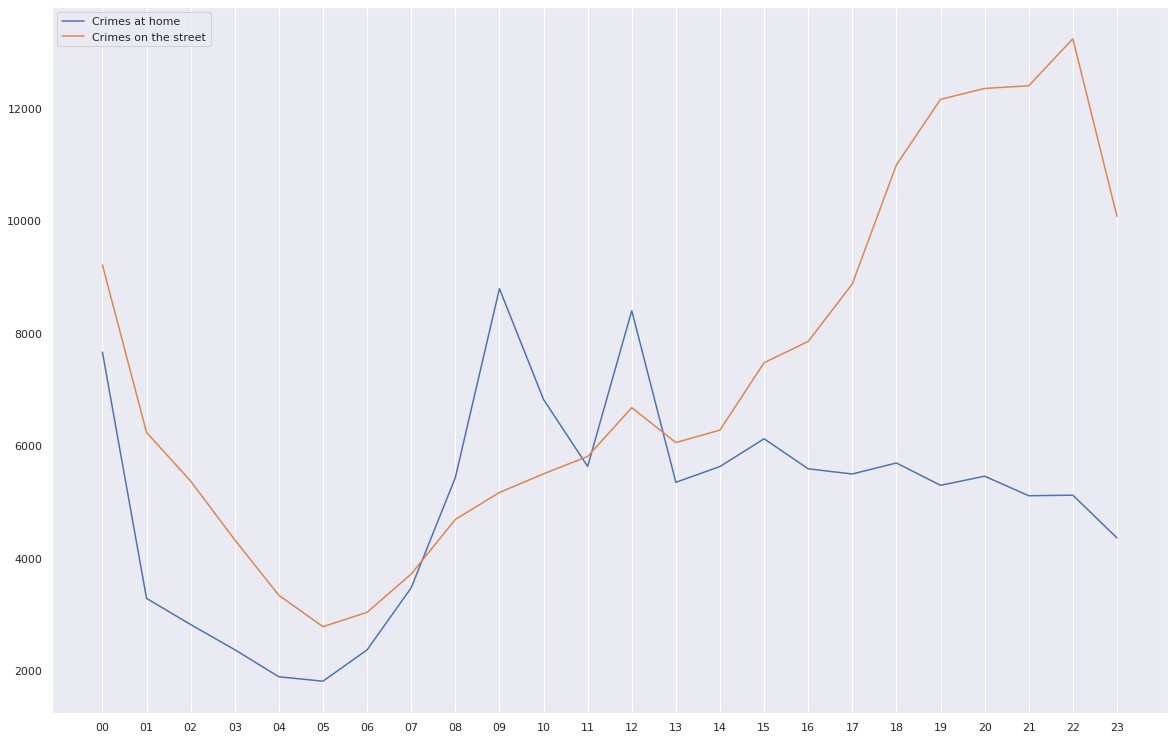

In [ ]:
plot = location_hour.toPandas()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(plot[plot['LocationDescription'] == 'RESIDENCE']['hour'], 
          plot[plot['LocationDescription'] == 'RESIDENCE']['count'],
         label='Crimes at home')
ax.plot(plot[plot['LocationDescription'] == 'STREET']['hour'], 
          plot[plot['LocationDescription'] == 'STREET']['count'],
         label='Crimes on the street')
ax.legend()
ax.grid(b=False, which='both', axis='y')

In [ ]:
area_names = """
01	Rogers Park	
40	Washington Park
02	West Ridge	
41	Hyde Park
03	Uptown	
42	Woodlawn
04	Lincoln Square	
43	South Shore
05	North Center	
44	Chatham
06	Lakeview	
45	Avalon Park
07	Lincoln Park	
46	South Chicago
08	Near North Side	
47	Burnside
09	Edison Park	
48	Calumet Heights
10	Norwood Park	
49	Roseland
11	Jefferson Park	
50	Pullman
12	Forest Glen	
51	South Deering
13	North Park	
52	East Side
14	Albany Park	
53	West Pullman
15	Portage Park	
54	Riverdale
16	Irving Park	
55	Hegewisch
17	Dunning	
56	Garfield Ridge
18	Montclare	
57	Archer Heights
19	Belmont Cragin	
58	Brighton Park
20	Hermosa	
59	McKinley Park
21	Avondale	
60	Bridgeport
22	Logan Square	
61	New City
23	Humboldt Park	
62	West Elsdon
24	West Town	
63	Gage Park
25	Austin	
64	Clearing
26	West Garfield Park 	
65	West Lawn
27	East Garfield Park	
66	Chicago Lawn
28	Near West Side	
67	West Englewood
29	North Lawndale	
68	Englewood
30	South Lawndale	
69	Greater Grand Crossing
31	Lower West Side	
70	Ashburn
32	Loop	
71	Auburn Gresham	
33	Near South Side	
72	Beverly
34	Armour Square	
73	Washington Heights
35	Douglas	
74	Mount Greenwood
36	Oakland	
75	Morgan Park
37	Fuller Park	
76	O'Hare
38	Grand Boulevard	
77	Edgewater
39	Kenwood	
"""

In [ ]:
code_pairs = [[float(p[0]), p[1]] for p in [pair.strip().split('\t') for pair in area_names.strip().split('\n')]]

In [ ]:
type(code_pairs)

list

In [ ]:
area_name_dic = {float(k[0]):k[1] for k in code_pairs}

In [ ]:
from itertools import chain
mapping_expr = f.create_map([lit(x) for x in chain(*area_name_dic.items())])

In [ ]:
df.show(1)

+-------+-----------+-------------------+-------------------+----+-----------+-----------+-------------------+------+--------+----+--------+----+-------------+-------+------------+-------------+----------+----+-----+---+---------+--------+----+----------+------+
|     ID|Case Number|               date|              Block|IUCR|PrimaryType|Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|    Latitude|    Longitude|  dateonly|year|month|day|dayofweek|timeonly|hour|   daypart|season|
+-------+-----------+-------------------+-------------------+----+-----------+-----------+-------------------+------+--------+----+--------+----+-------------+-------+------------+-------------+----------+----+-----+---+---------+--------+----+----------+------+
|9446824|   HX100141|2014-01-01 02:00:00|0000X W ILLINOIS ST|0460|    BATTERY|     SIMPLE|             STREET| false|   false|1831|      18|  42|            8|    08B|41.890828047|-87.630234746|2014-01-01|2014| 

In [ ]:
df = df.withColumn("area_name", mapping_expr.getItem(col("CommunityArea")))

In [ ]:
arrest_area_name = df.groupBy(['area_name', 'arrest'])\
                     .count()\
                     .orderBy(desc("count"))

arrest_area_name.show()

+--------------------+------+-----+
|           area_name|arrest|count|
+--------------------+------+-----+
|              Austin| false|31301|
|     Near North Side| false|20934|
|         South Shore| false|19134|
|      Near West Side| false|18930|
|              Austin|  true|18215|
|           West Town| false|18137|
|                Loop| false|16922|
|      Auburn Gresham| false|16441|
|      North Lawndale| false|15421|
|       Humboldt Park| false|14974|
|      West Englewood| false|14314|
|            Roseland| false|14156|
|Greater Grand Cro...| false|13969|
|           Englewood| false|13544|
|            Lakeview| false|13358|
|        Chicago Lawn| false|12835|
|             Chatham| false|12760|
|        Logan Square| false|11904|
|      Belmont Cragin| false|10270|
|       South Chicago| false|10110|
+--------------------+------+-----+
only showing top 20 rows



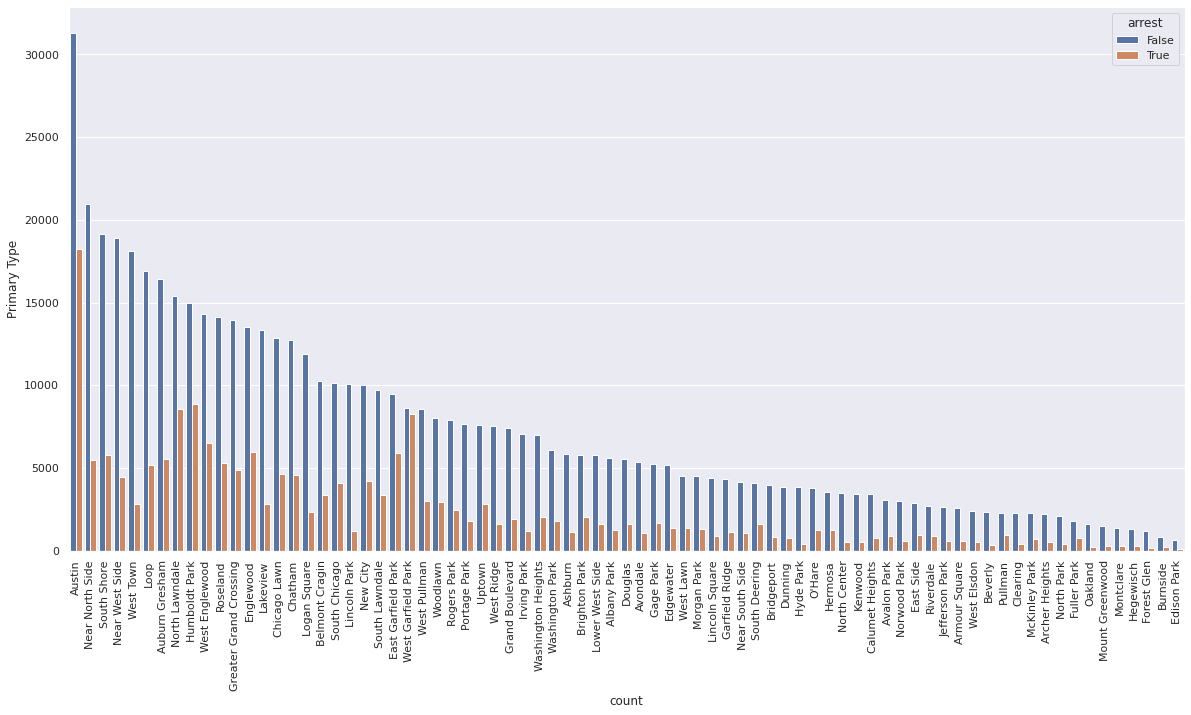

In [ ]:
plot = arrest_area_name.toPandas()
sns.set(rc={'figure.figsize':(20,10)})
type_graph = sns.barplot(y='count', x='area_name',hue= "arrest", data=plot)
type_graph.set(ylabel="Primary Type", xlabel="count")
plt.xticks(rotation=90)
plt.show()

# Predict arrest

In [ ]:
df.show(1)

+-------+-----------+-------------------+-------------------+----+-----------+-----------+-------------------+------+--------+----+--------+----+-------------+-------+------------+-------------+----------+----+-----+---+---------+--------+----+----------+------+---------------+
|     ID|Case Number|               date|              Block|IUCR|PrimaryType|Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|    Latitude|    Longitude|  dateonly|year|month|day|dayofweek|timeonly|hour|   daypart|season|      area_name|
+-------+-----------+-------------------+-------------------+----+-----------+-----------+-------------------+------+--------+----+--------+----+-------------+-------+------------+-------------+----------+----+-----+---+---------+--------+----+----------+------+---------------+
|9446824|   HX100141|2014-01-01 02:00:00|0000X W ILLINOIS ST|0460|    BATTERY|     SIMPLE|             STREET| false|   false|1831|      18|  42|            8|    

In [ ]:
df.schema.names

['ID',
 'Case Number',
 'date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'Latitude',
 'Longitude',
 'dateonly',
 'year',
 'month',
 'day',
 'dayofweek',
 'timeonly',
 'hour',
 'daypart',
 'season',
 'area_name']

variables needed to be removed: ID, Case Number, date, Block, IUCR,CommunityArea, Latitude, Longitude,dateonly, year, timeonly

In [ ]:
deselect_features = [
 'ID',
 'Case Number',
 'date',
 'Block',
 'IUCR',
 'Latitude',
 'Longitude',
 'dateonly',
 'year',
 'timeonly',
 'area_name']

In [ ]:
features_df = df.drop(*deselect_features)
features_df.printSchema()

root
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- CommunityArea: integer (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- dayofweek: integer (nullable = true)
 |-- hour: string (nullable = true)
 |-- daypart: string (nullable = false)
 |-- season: string (nullable = false)



In [ ]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

In [ ]:
features_df = features_df.withColumn("Arrest", col("Arrest").cast('string')) \
.withColumn("Domestic", col("Domestic").cast('string'))\
.withColumn("Beat", col("Beat").cast('float'))\
.withColumn("District", col("District").cast('float'))\
.withColumn("Ward", col("Ward").cast('float'))\
.withColumn("CommunityArea", col("CommunityArea").cast('float'))\
.withColumn("month", col("month").cast('float'))\
.withColumn("day", col("day").cast('float'))\
.withColumn("dayofweek", col("dayofweek").cast('float'))\
.withColumn("hour", col("hour").cast('float'))\
.withColumn("dayofweek", col("dayofweek").cast('float'))\

In [ ]:
features_df.printSchema()

root
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: double (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- CommunityArea: double (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: double (nullable = true)
 |-- dayofweek: double (nullable = true)
 |-- hour: double (nullable = true)
 |-- daypart: string (nullable = false)
 |-- season: string (nullable = false)



In [ ]:
features_df.show()

+-----------------+--------------------+--------------------+------+--------+------+--------+----+-------------+-------+-----+---+---------+----+----------+------+
|      PrimaryType|         Description| LocationDescription|Arrest|Domestic|  Beat|District|Ward|CommunityArea|FBICode|month|day|dayofweek|hour|   daypart|season|
+-----------------+--------------------+--------------------+------+--------+------+--------+----+-------------+-------+-----+---+---------+----+----------+------+
|          BATTERY|              SIMPLE|              STREET| false|   false|1831.0|    18.0|42.0|          8.0|    08B|  1.0|1.0|      4.0| 2.0|late night|winter|
|            THEFT|       FROM BUILDING|       BAR OR TAVERN| false|   false|1832.0|    18.0|42.0|          8.0|     06|  1.0|1.0|      4.0| 0.0|late night|winter|
|  CRIMINAL DAMAGE|         TO PROPERTY|           APARTMENT| false|   false|1523.0|    15.0|28.0|         25.0|     14|  1.0|1.0|      4.0| 0.0|late night|winter|
|          BATTE

In [ ]:
#PrimaryType,Description,LocationDescription,Arrest,Domestic,Beat

In [ ]:
features_df.columns

['PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'month',
 'day',
 'dayofweek',
 'hour',
 'daypart',
 'season']

In [ ]:
feature_level_count_dict = []

for feature in features_df.columns:
    levels_list_df = features_df.select(feature).distinct()
    feature_level_count_dict.append({'feature': feature, 'level_count': levels_list_df.count()})

In [ ]:
feature_level_count_dict

[{'feature': 'PrimaryType', 'level_count': 33},
 {'feature': 'Description', 'level_count': 335},
 {'feature': 'LocationDescription', 'level_count': 135},
 {'feature': 'Arrest', 'level_count': 2},
 {'feature': 'Domestic', 'level_count': 2},
 {'feature': 'Beat', 'level_count': 274},
 {'feature': 'District', 'level_count': 24},
 {'feature': 'Ward', 'level_count': 51},
 {'feature': 'CommunityArea', 'level_count': 79},
 {'feature': 'FBICode', 'level_count': 26},
 {'feature': 'month', 'level_count': 12},
 {'feature': 'day', 'level_count': 31},
 {'feature': 'dayofweek', 'level_count': 7},
 {'feature': 'hour', 'level_count': 24},
 {'feature': 'daypart', 'level_count': 8},
 {'feature': 'season', 'level_count': 4}]

In [ ]:
pd.DataFrame(feature_level_count_dict).sort_values(by='level_count', ascending=False)

,feature,level_count
1,Description,335
5,Beat,274
2,LocationDescription,135
8,CommunityArea,79
7,Ward,51
0,PrimaryType,33
11,day,31
9,FBICode,26
6,District,24
13,hour,24


In [ ]:
indices = [0,1,2,3,4,9,-2,-1]
selected_elements = []
for index in indices:
    selected_elements.append(feature_level_count_dict[index])

In [ ]:
selected_elements

[{'feature': 'PrimaryType', 'level_count': 33},
 {'feature': 'Description', 'level_count': 335},
 {'feature': 'LocationDescription', 'level_count': 135},
 {'feature': 'Arrest', 'level_count': 2},
 {'feature': 'Domestic', 'level_count': 2},
 {'feature': 'FBICode', 'level_count': 26},
 {'feature': 'daypart', 'level_count': 8},
 {'feature': 'season', 'level_count': 4}]

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler, VectorIndexer

In [ ]:
features_df = features_df.replace('?', None).dropna(how='any')
features_df = features_df.dropDuplicates()

In [ ]:
print((df.count(), len(df.columns)))

(754541, 27)


In [ ]:
print((features_df.count(), len(features_df.columns)))

(749252, 16)


In [ ]:
features_df.show(1)

KeyboardInterrupt: ignored

In [ ]:
required_index = ['PrimaryType',
                  'LocationDescription',
                  'Arrest',
                  'Domestic',
                  'FBICode',
                  'daypart',
                  'season']

In [ ]:
for feature in selected_elements:
  print(feature['feature'])

PrimaryType
Description
LocationDescription
Arrest
Domestic
FBICode
daypart
season


In [ ]:
for feature in selected_elements:
    indexer = StringIndexer(inputCol=feature['feature'], outputCol='%s_indexed' % feature['feature'])
    print('Fitting feature "%s"' % feature['feature'])
    model = indexer.fit(features_df)
    print('Transforming "%s"' % feature['feature'])
    features_df = model.transform(features_df)

Fitting feature "PrimaryType"


KeyboardInterrupt: ignored

In [ ]:
features_df.show()

+-----------------+--------------------+--------------------+------+--------+------+--------+----+-------------+-------+-----+---+---------+----+----------+------+-------------------+-------------------+---------------------------+--------------+----------------+---------------+---------------+--------------+
|      PrimaryType|         Description| LocationDescription|Arrest|Domestic|  Beat|District|Ward|CommunityArea|FBICode|month|day|dayofweek|hour|   daypart|season|PrimaryType_indexed|Description_indexed|LocationDescription_indexed|Arrest_indexed|Domestic_indexed|FBICode_indexed|daypart_indexed|season_indexed|
+-----------------+--------------------+--------------------+------+--------+------+--------+----+-------------+-------+-----+---+---------+----+----------+------+-------------------+-------------------+---------------------------+--------------+----------------+---------------+---------------+--------------+
|          BATTERY|              SIMPLE|              STREET| false

In [ ]:
features_df.printSchema()

root
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: double (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- CommunityArea: double (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: double (nullable = true)
 |-- dayofweek: double (nullable = true)
 |-- hour: double (nullable = true)
 |-- daypart: string (nullable = true)
 |-- season: string (nullable = true)
 |-- PrimaryType_indexed: double (nullable = false)
 |-- Description_indexed: double (nullable = false)
 |-- LocationDescription_indexed: double (nullable = false)
 |-- Arrest_indexed: double (nullable = false)
 |-- Domestic_indexed: double (nullable = false)
 |-- FBICode_indexed: double (nullable = false)
 |-- daypart_indexed: double (nullable = false)
 |

In [ ]:
required_onehot = ['PrimaryType_indexed','Description_indexed','LocationDescription_indexed','Domestic_indexed','Beat','District','Ward','CommunityArea','FBICode_indexed','month','day','dayofweek','hour','daypart_indexed','season_indexed']

In [ ]:
for feature in required_onehot:
    OneHot = OneHotEncoderEstimator()\
    .setInputCols([feature])\
    .setOutputCols([feature+'onehoted'])
    print('Fitting feature "%s"' % feature)
    model = OneHot.fit(features_df)
    print('Transforming "%s"' % feature)
    features_df = model.transform(features_df)

Fitting feature "PrimaryType_indexed"
Transforming "PrimaryType_indexed"
Fitting feature "Description_indexed"
Transforming "Description_indexed"
Fitting feature "LocationDescription_indexed"
Transforming "LocationDescription_indexed"
Fitting feature "Domestic_indexed"
Transforming "Domestic_indexed"
Fitting feature "Beat"


KeyboardInterrupt: ignored

In [ ]:
required_features = ['PrimaryType_indexed',
                    'Description_indexed',
                    'LocationDescription_indexed',
                    'Domestic_indexed',
                    'Beat',
                    'District',
                    'Ward',
                    'CommunityArea',
                    'FBICode_indexed',
                    'month',
                    'day',
                    'dayofweek',
                    'hour',
                    'daypart_indexed',
                    'season_indexed',
                   ]

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=required_features, outputCol='NumFeatures')

transformed_data = assembler.transform(features_df)

standardscaler = StandardScaler(inputCol="NumFeatures", outputCol="features", withMean=True, withStd=True)

In [ ]:
transformed_data.show()

+-----------------+--------------------+--------------------+------+--------+------+--------+----+-------------+-------+-----+---+---------+----+----------+------+-------------------+-------------------+---------------------------+--------------+----------------+---------------+---------------+--------------+--------------------+
|      PrimaryType|         Description| LocationDescription|Arrest|Domestic|  Beat|District|Ward|CommunityArea|FBICode|month|day|dayofweek|hour|   daypart|season|PrimaryType_indexed|Description_indexed|LocationDescription_indexed|Arrest_indexed|Domestic_indexed|FBICode_indexed|daypart_indexed|season_indexed|            features|
+-----------------+--------------------+--------------------+------+--------+------+--------+----+-------------+-------+-----+---+---------+----+----------+------+-------------------+-------------------+---------------------------+--------------+----------------+---------------+---------------+--------------+--------------------+
|   

# Modeling

In [ ]:
# Split the data
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [ ]:
# Define the model
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='Arrest_indexed', 
                            featuresCol='features',
                            maxDepth=5,maxBins=335)

In [ ]:
training_data.printSchema()

root
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: float (nullable = true)
 |-- District: float (nullable = true)
 |-- Ward: float (nullable = true)
 |-- CommunityArea: float (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- month: float (nullable = true)
 |-- day: float (nullable = true)
 |-- dayofweek: float (nullable = true)
 |-- hour: float (nullable = true)
 |-- daypart: string (nullable = true)
 |-- season: string (nullable = true)
 |-- PrimaryType_indexed: double (nullable = false)
 |-- Description_indexed: double (nullable = false)
 |-- LocationDescription_indexed: double (nullable = false)
 |-- Arrest_indexed: double (nullable = false)
 |-- Domestic_indexed: double (nullable = false)
 |-- FBICode_indexed: double (nullable = false)
 |-- daypart_indexed: double (nullable = false)
 |-- seaso

In [ ]:
# Fit the model
model = rf.fit(training_data)

In [ ]:
# Predict with the test dataset
predictions = model.transform(test_data)

In [ ]:
# Evaluate our model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol='Arrest_indexed', 
    predictionCol='prediction', 
    metricName='accuracy')

In [ ]:
accuracy = evaluator.evaluate(predictions)

In [ ]:
accuracy

0.8338034165291895

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create both evaluators
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="Arrest_indexed", predictionCol="prediction")
evaluator = BinaryClassificationEvaluator(labelCol="Arrest_indexed", rawPredictionCol="prediction", metricName='areaUnderROC')

# Make predicitons
predictionAndTarget = model.transform(test_data).select("Arrest_indexed", "prediction")

# Get metrics
acc = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "f1"})
weightedPrecision = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedRecall"})
auc = evaluator.evaluate(predictionAndTarget)

In [ ]:
print('accuracy:',acc)
print('f1:',f1)
print('weightedPrecision:',weightedPrecision)
print('weightedRecall:',weightedRecall)
print('auc:',auc)

accuracy: 0.8338034165291895
f1: 0.8014403429421004
weightedPrecision: 0.8625635396379527
weightedRecall: 0.8338034165291895
auc: 0.6701314216648344
